In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Substitua 'caminho_para_o_arquivo.xlsx' pelo caminho do seu arquivo
votacao = pd.read_excel('./dados/votacao_candidato.xlsx')
receita = pd.read_excel('./dados/receitas_candidatos.xlsx')
# Agora 'df' é um DataFrame do pandas que contém os dados da planilha xlsx

In [4]:
votacao.head(3)

,Município,Gênero,Estado civil,Faixa etária,Zona,Ano de eleição,Partido,Número candidato,Nome candidato,Grau de instrução,Cor/raça,Situação totalização,Turno,Ocupação,Cargo,Votos nominais,Votos válidos,Data de carga,Unnamed: 18,Unnamed: 19
0,MAUÁ,Masculino,Solteiro(a),40 a 44 anos,365,2020,PODE,19444,FABIO DANILO ALVES CASTRO,Ensino Médio completo,Parda,Suplente,1,Fotógrafo e Assemelhados,Vereador,4,81372,2024-03-23 01:16:31,NaN,NaN
1,MAUÁ,Masculino,Casado(a),60 a 64 anos,365,2020,PMN,33344,JOSE CICERO DA SILVA,Ensino Fundamental incompleto,Branca,Não Eleito,1,Outros,Vereador,42,81372,2024-03-23 01:16:31,NaN,29.0
2,MAUÁ,Masculino,Solteiro(a),40 a 44 anos,339,2020,PRTB,28017,ANTONIO ALVES DA SILVA,Ensino Médio completo,Parda,Não Eleito,1,Outros,Vereador,17,62989,2024-03-23 01:16:31,NaN,NaN


In [99]:
# Agrupar pelo 'Nome do candidato' e somar os 'Votos nominais'
votacao1 = votacao.groupby('Nome candidato')['Votos nominais'].sum().reset_index()

# Juntar o resultado com o dataframe original
votacao_final = pd.merge(votacao, votacao1, on='Nome candidato', suffixes=('', '_soma'))

# Renomear a coluna 'Votos nominais_soma' para 'Votos nominais'
votacao_final = votacao_final.rename(columns={'Votos nominais_soma': 'Votos totais'})
votacao_final.head(3)

,Município,Gênero,Estado civil,Faixa etária,Zona,Ano de eleição,Partido,Número candidato,Nome candidato,Grau de instrução,...,Situação totalização,Turno,Ocupação,Cargo,Votos nominais,Votos válidos,Data de carga,Unnamed: 18,Unnamed: 19,Votos totais
0,MAUÁ,Masculino,Solteiro(a),40 a 44 anos,365,2020,PODE,19444,FABIO DANILO ALVES CASTRO,Ensino Médio completo,...,Suplente,1,Fotógrafo e Assemelhados,Vereador,4,81372,2024-03-23 01:16:31,NaN,NaN,35
1,MAUÁ,Masculino,Casado(a),60 a 64 anos,365,2020,PMN,33344,JOSE CICERO DA SILVA,Ensino Fundamental incompleto,...,Não Eleito,1,Outros,Vereador,42,81372,2024-03-23 01:16:31,NaN,29.0,107
2,MAUÁ,Masculino,Solteiro(a),40 a 44 anos,339,2020,PRTB,28017,ANTONIO ALVES DA SILVA,Ensino Médio completo,...,Não Eleito,1,Outros,Vereador,17,62989,2024-03-23 01:16:31,NaN,NaN,46


In [51]:
receita.head(3)

,Ano de eleição,Partido,Nome candidato,Cargo,Esfera,Esfera partidária,Espécie receita,Fonte de receita,Município,Origem da receita,Nome doador,Situação de candidatura,Situação de totalização,Valor de receita,Data de carga
0,2020,AVANTE,ANA PAULA DA SILVA,Vereador,Municipal,Não se aplica,Transferência eletrônica,OUTROS RECURSOS,MAUÁ,Recursos de pessoas físicas,MARCO ANTONIO SOARES MOREIRA,Apto,Suplente,600.0,2024-03-22 23:20:33
1,2020,AVANTE,CARLOS WILSON TOMAZ,Vereador,Municipal,Não se aplica,Estimado,OUTROS RECURSOS,MAUÁ,Recursos de pessoas físicas,ANA BEATRIZ FURLANETO PRUDENCIO,Apto,Suplente,1000.0,2024-03-22 23:20:33
2,2020,AVANTE,CARLOS WILSON TOMAZ,Vereador,Municipal,Não se aplica,Estimado,OUTROS RECURSOS,MAUÁ,Recursos de pessoas físicas,BEATRIZ TOMAZ,Apto,Suplente,1000.0,2024-03-22 23:20:33


In [52]:
receita.columns

Index(['Ano de eleição', 'Partido', 'Nome candidato', 'Cargo', 'Esfera',
       'Esfera partidária', 'Espécie receita', 'Fonte de receita', 'Município',
       'Origem da receita', 'Nome doador', 'Situação de candidatura',
       'Situação de totalização', 'Valor de receita', 'Data de carga'],
      dtype='object')

In [53]:
receita.dtypes

Ano de eleição               int64
Partido                     object
Nome candidato              object
Cargo                       object
Esfera                      object
Esfera partidária           object
Espécie receita             object
Fonte de receita            object
Município                   object
Origem da receita           object
Nome doador                 object
Situação de candidatura     object
Situação de totalização     object
Valor de receita           float64
Data de carga               object
dtype: object

In [54]:
receita.describe()

,Ano de eleição,Valor de receita
count,2322.0,2322.000000
mean,2020.0,3910.036128
std,0.0,28390.997697
min,2020.0,0.630000
25%,2020.0,500.000000
50%,2020.0,800.000000
75%,2020.0,2000.000000
max,2020.0,855000.000000


In [55]:
psol = receita[receita['Partido'] == 'PSOL']
psol.describe()

,Ano de eleição,Valor de receita
count,16.0,16.000000
mean,2020.0,1832.425000
std,0.0,1464.090461
min,2020.0,20.000000
25%,2020.0,325.000000
50%,2020.0,1861.515000
75%,2020.0,3083.290000
max,2020.0,4522.160000


In [56]:
soma_doacoes = receita.groupby('Nome candidato')['Valor de receita'].sum().reset_index()
soma_doacoes

,Nome candidato,Valor de receita
0,ABNER DOS SANTOS SILVA,4700.00
1,ADAIR RIBEIRO DA SILVA,7500.00
2,ADAN ALEXANDER DE MATOSINHOS,405.00
3,ADELTO DAMASCENO GOMES,8396.73
4,ADMIR JACOMUSSI,88124.44
...,...,...
509,WESLLEY SANTANA LUIZ,1160.00
510,WILLIAN DE SOUZA COSTA TOME,1348.10
511,WILLIAN GOMES GALDINO,1110.00
512,WILSON CHINCHIO,100.00


In [59]:
votacaoReceita = votacao_final.merge(soma_doacoes, on='Nome candidato')
votacaoReceita.head(5)

,Município,Gênero,Estado civil,Faixa etária,Zona,Ano de eleição,Partido,Número candidato,Nome candidato,Grau de instrução,...,Turno,Ocupação,Cargo,Votos nominais,Votos válidos,Data de carga,Unnamed: 18,Unnamed: 19,Votos totais,Valor de receita
0,MAUÁ,Masculino,Casado(a),60 a 64 anos,365,2020,PMN,33344,JOSE CICERO DA SILVA,Ensino Fundamental incompleto,...,1,Outros,Vereador,42,81372,2024-03-23 01:16:31,NaN,29.0,107,770.00
1,MAUÁ,Masculino,Solteiro(a),35 a 39 anos,339,2020,PL,22124,ALCIDES GARCIA JUNIOR,Ensino Médio completo,...,1,Comerciante,Vereador,75,62989,2024-03-23 01:16:31,NaN,NaN,461,10000.00
2,MAUÁ,Feminino,Solteiro(a),35 a 39 anos,339,2020,PSL,17910,ANDRÉIA MARIA DA SILVA,Ensino Médio completo,...,1,Outros,Vereador,15,62989,2024-03-23 01:16:31,NaN,NaN,102,2500.00
3,MAUÁ,Masculino,Casado(a),55 a 59 anos,217,2020,REPUBLICANOS,10122,MARCOS JOAO DA SILVA,Superior completo,...,1,Professor de Ensino Superior,Vereador,17,56510,2024-03-23 01:16:31,NaN,NaN,54,46.73
4,MAUÁ,Feminino,Solteiro(a),30 a 34 anos,217,2020,PSL,17016,ANDRESSA DE BARROS PAULA,Ensino Médio completo,...,1,Dona de Casa,Vereador,14,56510,2024-03-23 01:16:31,NaN,NaN,26,1700.00


In [60]:
votacaoReceita.columns

Index(['Município', 'Gênero', 'Estado civil', 'Faixa etária', 'Zona',
       'Ano de eleição', 'Partido', 'Número candidato', 'Nome candidato',
       'Grau de instrução', 'Cor/raça', 'Situação totalização', 'Turno',
       'Ocupação', 'Cargo', 'Votos nominais', 'Votos válidos', 'Data de carga',
       'Unnamed: 18', 'Unnamed: 19', 'Votos totais', 'Valor de receita'],
      dtype='object')

In [61]:
votacaoReceita = votacaoReceita.drop(['Data de carga', 'Unnamed: 18', 'Unnamed: 19'], axis=1)

In [63]:
votacaoReceita.columns

Index(['Município', 'Gênero', 'Estado civil', 'Faixa etária', 'Zona',
       'Ano de eleição', 'Partido', 'Número candidato', 'Nome candidato',
       'Grau de instrução', 'Cor/raça', 'Situação totalização', 'Turno',
       'Ocupação', 'Cargo', 'Votos nominais', 'Votos válidos', 'Votos totais',
       'Valor de receita'],
      dtype='object')

In [71]:
candidados = votacaoReceita[['Partido','Nome candidato','Número candidato','Votos totais', 'Valor de receita','Faixa etária','Gênero','Cor/raça', 'Grau de instrução', 'Situação totalização','Turno','Cargo']]

In [72]:
candidados.head(5)

,Partido,Nome candidato,Número candidato,Votos totais,Valor de receita,Faixa etária,Gênero,Cor/raça,Grau de instrução,Situação totalização,Turno,Cargo
0,PMN,JOSE CICERO DA SILVA,33344,107,770.00,60 a 64 anos,Masculino,Branca,Ensino Fundamental incompleto,Não Eleito,1,Vereador
1,PL,ALCIDES GARCIA JUNIOR,22124,461,10000.00,35 a 39 anos,Masculino,Parda,Ensino Médio completo,Suplente,1,Vereador
2,PSL,ANDRÉIA MARIA DA SILVA,17910,102,2500.00,35 a 39 anos,Feminino,Branca,Ensino Médio completo,Não Eleito,1,Vereador
3,REPUBLICANOS,MARCOS JOAO DA SILVA,10122,54,46.73,55 a 59 anos,Masculino,Preta,Superior completo,Suplente,1,Vereador
4,PSL,ANDRESSA DE BARROS PAULA,17016,26,1700.00,30 a 34 anos,Feminino,Branca,Ensino Médio completo,Não Eleito,1,Vereador


In [73]:
candidados[['Votos totais', 'Valor de receita']].corr()

,Votos totais,Valor de receita
Votos totais,1.000000,0.981429
Valor de receita,0.981429,1.000000


In [78]:
candidados.loc[:, 'Custo por voto'] = candidados['Valor de receita'] / candidados['Votos totais']

In [79]:
candidados.head(5)

,Partido,Nome candidato,Número candidato,Votos totais,Valor de receita,Faixa etária,Gênero,Cor/raça,Grau de instrução,Situação totalização,Turno,Cargo,Custo por voto
0,PMN,JOSE CICERO DA SILVA,33344,107,770.00,60 a 64 anos,Masculino,Branca,Ensino Fundamental incompleto,Não Eleito,1,Vereador,7.196262
1,PL,ALCIDES GARCIA JUNIOR,22124,461,10000.00,35 a 39 anos,Masculino,Parda,Ensino Médio completo,Suplente,1,Vereador,21.691974
2,PSL,ANDRÉIA MARIA DA SILVA,17910,102,2500.00,35 a 39 anos,Feminino,Branca,Ensino Médio completo,Não Eleito,1,Vereador,24.509804
3,REPUBLICANOS,MARCOS JOAO DA SILVA,10122,54,46.73,55 a 59 anos,Masculino,Preta,Superior completo,Suplente,1,Vereador,0.865370
4,PSL,ANDRESSA DE BARROS PAULA,17016,26,1700.00,30 a 34 anos,Feminino,Branca,Ensino Médio completo,Não Eleito,1,Vereador,65.384615


In [131]:
candidados['Situação totalização'].unique()

array(['Suplente', 'Não Eleito', 'Eleito', 'Segundo turno'], dtype=object)

In [115]:
eleitos = candidados[candidados['Situação totalização'] == 'Eleito']
eleitos = eleitos.drop_duplicates(subset=['Nome candidato'])
eleitos.head(5)


,Partido,Nome candidato,Número candidato,Votos totais,Valor de receita,Faixa etária,Gênero,Cor/raça,Grau de instrução,Situação totalização,Turno,Cargo,Custo por voto
431,PDT,ALESSANDRO FAUSTINO MARTINS,12600,4548,16340.0,35 a 39 anos,Masculino,Branca,Superior incompleto,Eleito,1,Vereador,3.592788
421,AVANTE,FRANCISCO ESMERALDO FELIPE CARNEIRO,70123,2466,14979.3,55 a 59 anos,Masculino,Branca,Ensino Médio completo,Eleito,1,Vereador,6.074331
751,PSD,MÁRCIO DA SILVA ARAÚJO,55123,3356,22200.0,40 a 44 anos,Masculino,Branca,Superior completo,Eleito,1,Vereador,6.615018
844,PSB,RICARDO MANOEL DE ALMEIDA,40123,3183,25200.0,40 a 44 anos,Masculino,Preta,Ensino Médio completo,Eleito,1,Vereador,7.917059
740,AVANTE,RENAN PESSOA DA CRUZ,70456,2703,24040.8,30 a 34 anos,Masculino,Branca,Superior completo,Eleito,1,Vereador,8.894118


In [119]:
eleitos['Votos totais'].describe()

count        24.000000
mean       7773.375000
std       26005.177126
min        1102.000000
25%        1667.250000
50%        2602.000000
75%        3054.000000
max      129789.000000
Name: Votos totais, dtype: float64

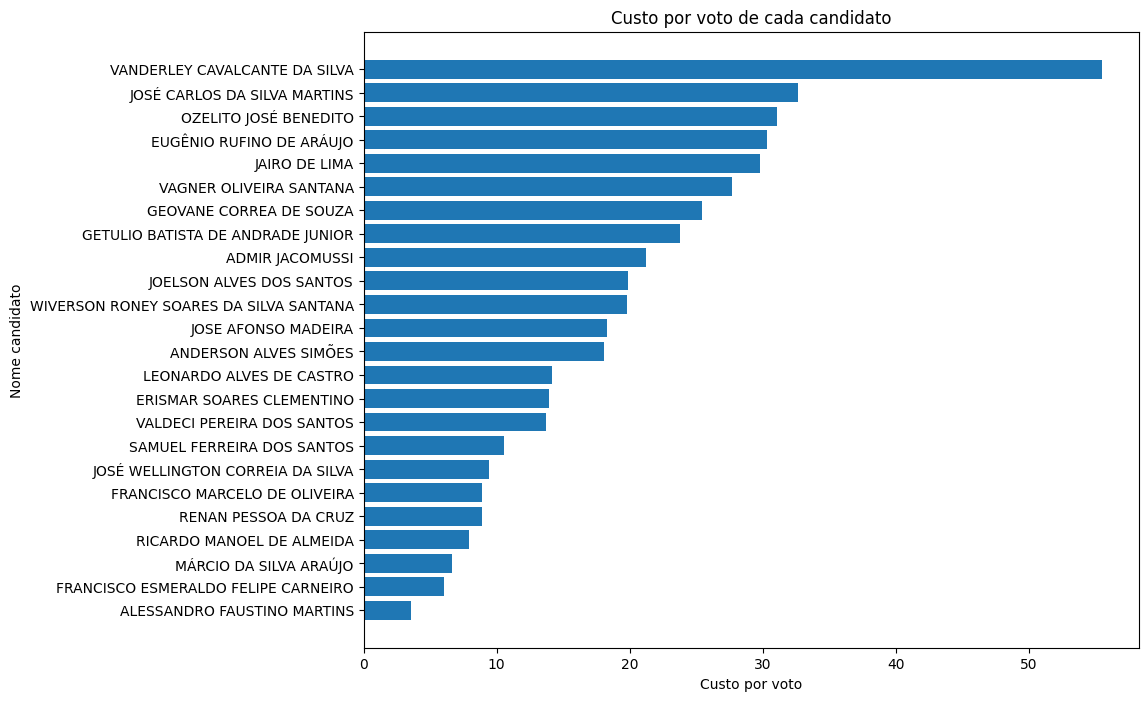

In [130]:
eleitos = eleitos.sort_values('Custo por voto')

plt.figure(figsize=(10,8))
plt.barh(eleitos['Nome candidato'], eleitos['Custo por voto'])
plt.xlabel('Custo por voto')
plt.ylabel('Nome candidato')
plt.title('Custo por voto de cada candidato')
plt.show()

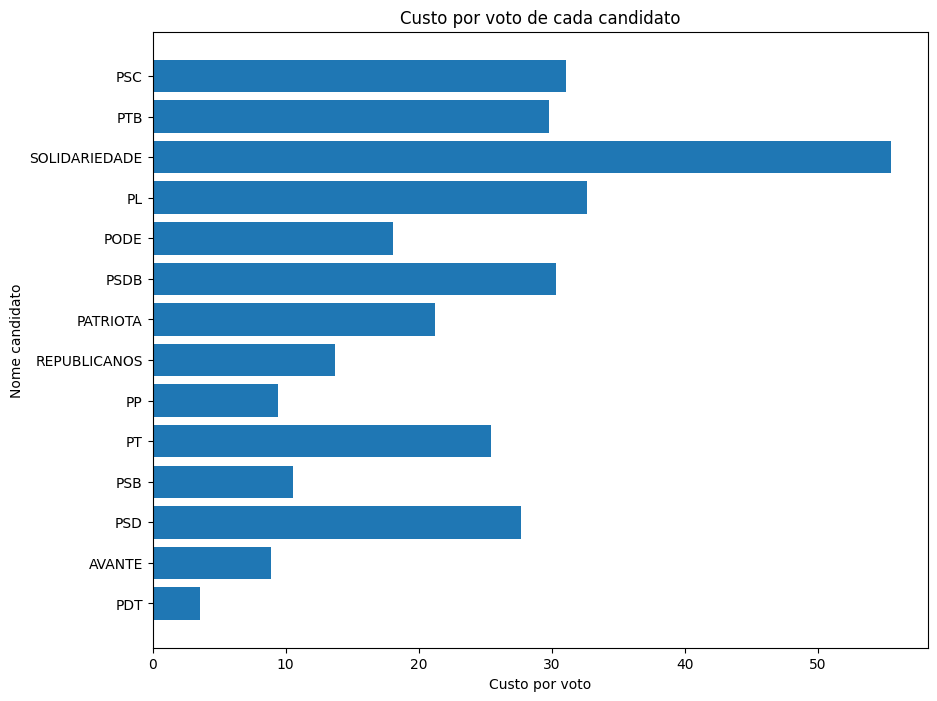

In [165]:
eleitos = eleitos.sort_values('Custo por voto')

plt.figure(figsize=(10,8))
plt.barh(eleitos['Partido'], eleitos['Custo por voto'])
plt.xlabel('Custo por voto')
plt.ylabel('Nome candidato')
plt.title('Custo por voto de cada candidato')
plt.show()

In [166]:
naoEleitos = candidados[candidados['Situação totalização'] == 'Não Eleito']
naoEleitos = naoEleitos.drop_duplicates(subset=['Nome candidato'])
naoEleitos.head(5)

,Partido,Nome candidato,Número candidato,Votos totais,Valor de receita,Faixa etária,Gênero,Cor/raça,Grau de instrução,Situação totalização,Turno,Cargo,Custo por voto
1182,CIDADANIA,LUIZ CARLOS ROSA,23001,279,132.6,50 a 54 anos,Masculino,Preta,Ensino Fundamental completo,Não Eleito,1,Vereador,0.475269
314,CIDADANIA,RODRIGO FERNANDO MARTINS,23000,248,145.2,35 a 39 anos,Masculino,Parda,Ensino Médio completo,Não Eleito,1,Vereador,0.585484
1221,CIDADANIA,RICARDO SILVA DOS SANTOS,23536,129,132.6,35 a 39 anos,Masculino,Parda,Ensino Médio completo,Não Eleito,1,Vereador,1.027907
1324,CIDADANIA,RAFAEL RANDAL PORFIRIO PASSOS,23233,117,132.6,35 a 39 anos,Masculino,Preta,Ensino Médio completo,Não Eleito,1,Vereador,1.133333
405,CIDADANIA,FERNANDO LUIZ DOS SANTOS,23123,96,132.6,35 a 39 anos,Masculino,Parda,Superior completo,Não Eleito,1,Vereador,1.381250


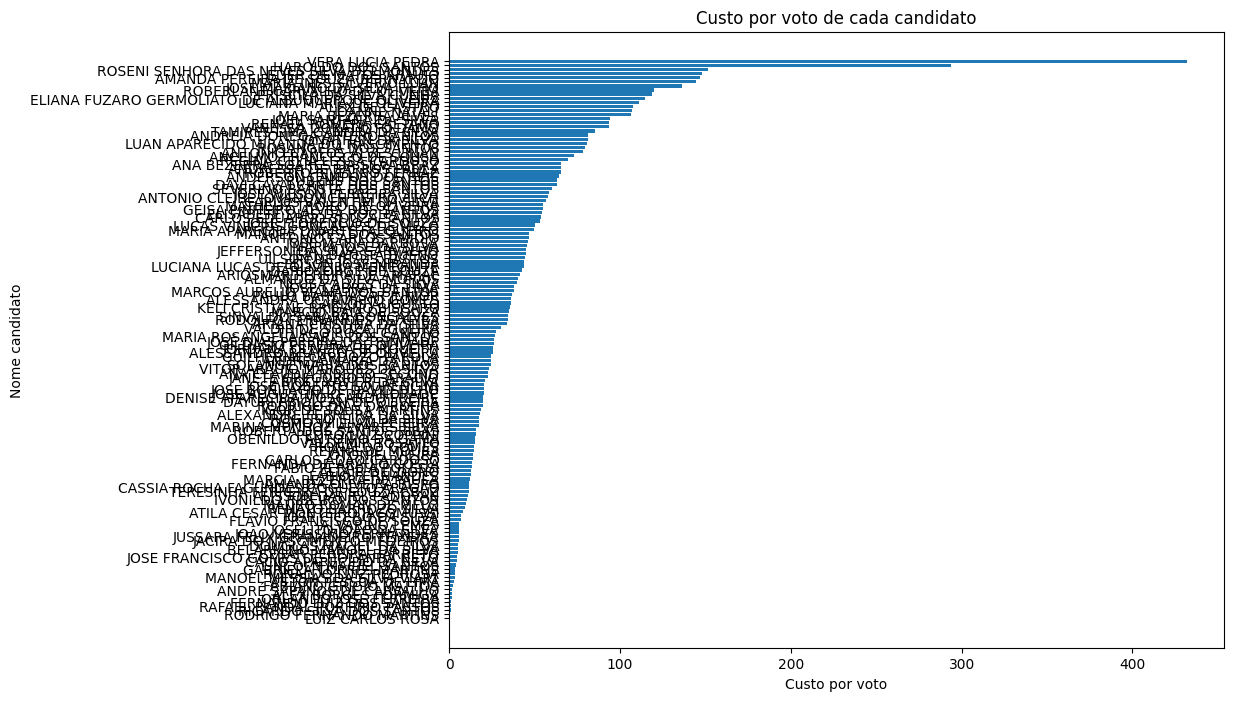

In [167]:
naoEleitos = naoEleitos.sort_values('Custo por voto')

plt.figure(figsize=(10,8))
plt.barh(naoEleitos['Nome candidato'], naoEleitos['Custo por voto'])
plt.xlabel('Custo por voto')
plt.ylabel('Nome candidato')
plt.title('Custo por voto de cada candidato')
plt.show()

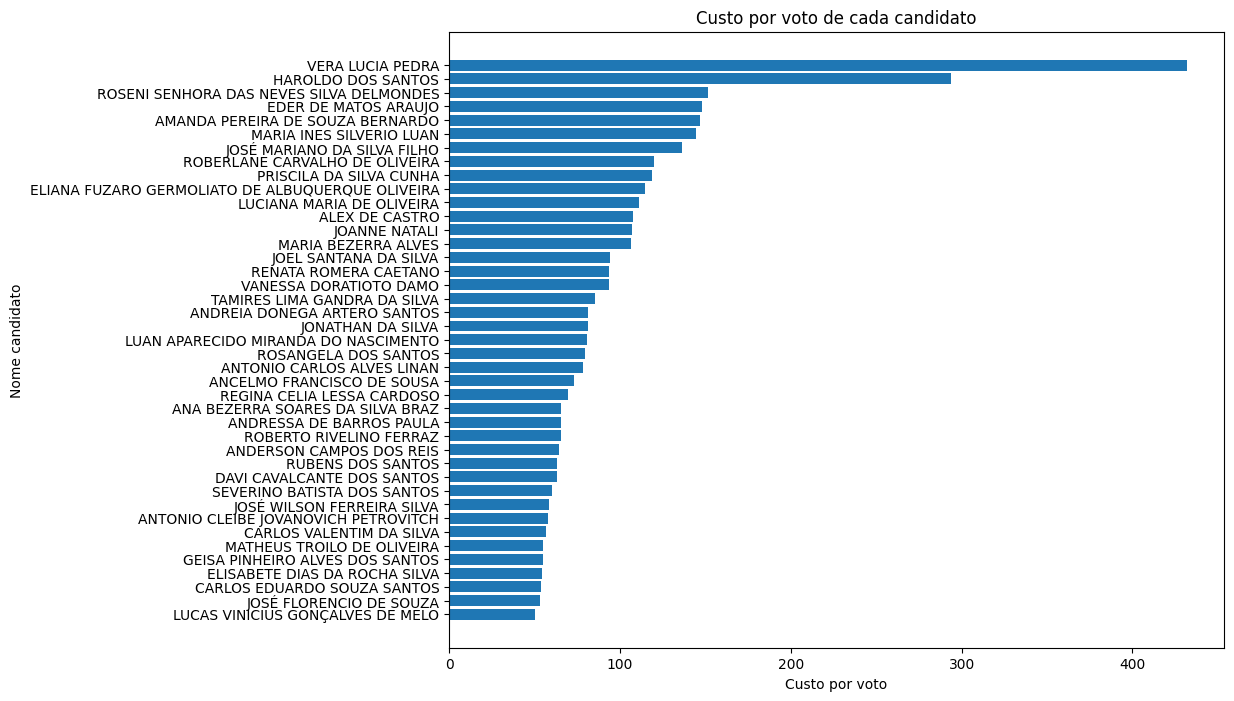

In [169]:
filtro = naoEleitos['Custo por voto'] > 50
naoEleitos = naoEleitos[filtro]

plt.figure(figsize=(10,8))
plt.barh(naoEleitos['Nome candidato'], naoEleitos['Custo por voto'])
plt.xlabel('Custo por voto')
plt.ylabel('Nome candidato')
plt.title('Custo por voto de cada candidato')
plt.show()

In [170]:
candidados.columns

Index(['Partido', 'Nome candidato', 'Número candidato', 'Votos totais',
       'Valor de receita', 'Faixa etária', 'Gênero', 'Cor/raça',
       'Grau de instrução', 'Situação totalização', 'Turno', 'Cargo',
       'Custo por voto'],
      dtype='object')

In [171]:
candidados['Cor/raça'].unique()	

array(['Parda', 'Branca', 'Preta'], dtype=object)

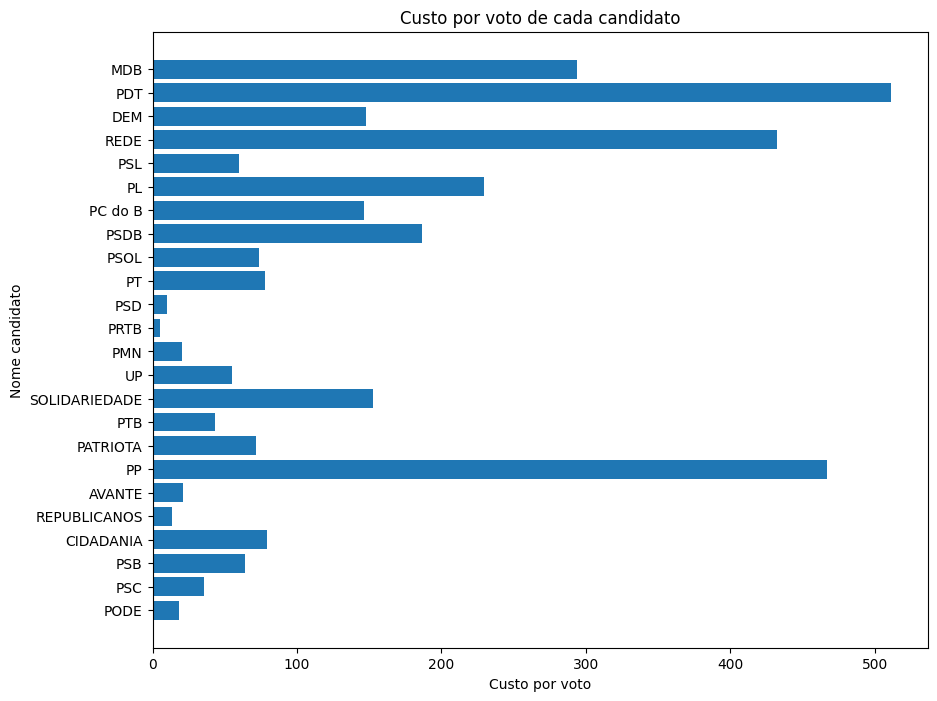

In [177]:
filtro = candidados['Cor/raça'].isin(['Parda', 'Preta'])
negros = candidados[filtro]

plt.figure(figsize=(10,8))
plt.barh(negros['Partido'], negros['Custo por voto'])
plt.xlabel('Custo por voto')
plt.ylabel('Nome candidato')
plt.title('Custo por voto de cada candidato')
plt.show()

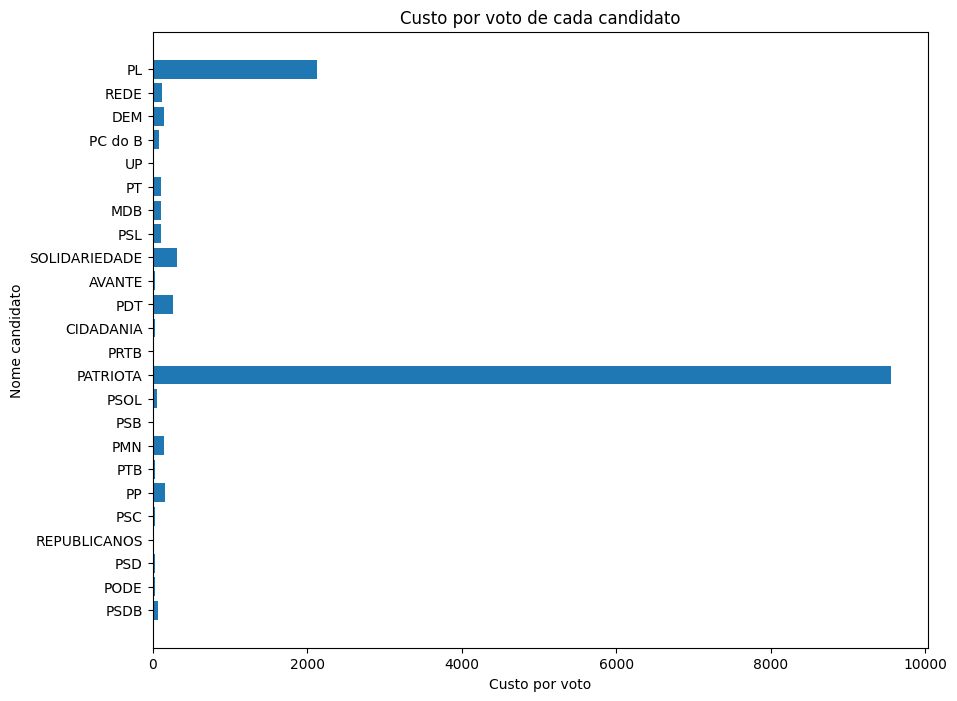

In [178]:
filtro = candidados['Cor/raça'].isin(['Branca'])
negros = candidados[filtro]

plt.figure(figsize=(10,8))
plt.barh(negros['Partido'], negros['Custo por voto'])
plt.xlabel('Custo por voto')
plt.ylabel('Nome candidato')
plt.title('Custo por voto de cada candidato')
plt.show()